## Overlap and coverage plots

### BUSCO Augustus

   Species         GeneID   transcript  overlap uniprotID  coverage
0     6239  103854at33208  r2.m1.g1.t1   1650.0    Q19954  0.802529
1     6239  103854at33208  r2.m1.g1.t1   2056.0    Q19954  1.000000
2     6239  103854at33208  r2.m1.g1.t1   1650.0    Q19954  0.810015
3     6239  311758at33208  r2.m1.g1.t1    668.0    G8JY22  0.891856
4     6239  311758at33208  r2.m1.g1.t1   1401.0    H2KYN0  0.857930
   Species         GeneID   transcript  overlap uniprotID  coverage
0     6239  103854at33208  r2.m1.g1.t1   1650.0    Q19954  0.802529
1     6239  103854at33208  r2.m1.g1.t1   2056.0    Q19954  1.000000
2     6239  103854at33208  r2.m1.g1.t1   1650.0    Q19954  0.810015
3     6239  311758at33208  r2.m1.g1.t1    668.0    G8JY22  0.891856
4     6239  311758at33208  r2.m1.g1.t1   1401.0    H2KYN0  0.857930


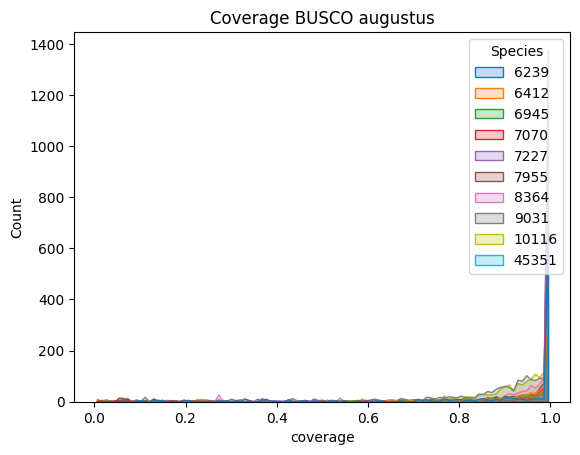

In [2]:
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd

#sb.histplot(df_overlap, x="overlap", hue="Species", element="poly")
busco_augustus_df = pd.read_csv('../overlap_tables/busco_augustus_overlap_gff_files_gallus_v2.tsv', delimiter='\t')
print(busco_augustus_df.head())
busco_augustus_df.dropna(inplace=True)
print(busco_augustus_df.head())

palette = sb.color_palette("tab10")
sb.set_palette(palette)
sb.histplot(busco_augustus_df, x="coverage", hue="Species", element="poly", palette=palette)

plt.title('Coverage BUSCO augustus')
plt.savefig('busco_augustus_coverage.png', dpi=900, bbox_inches='tight')

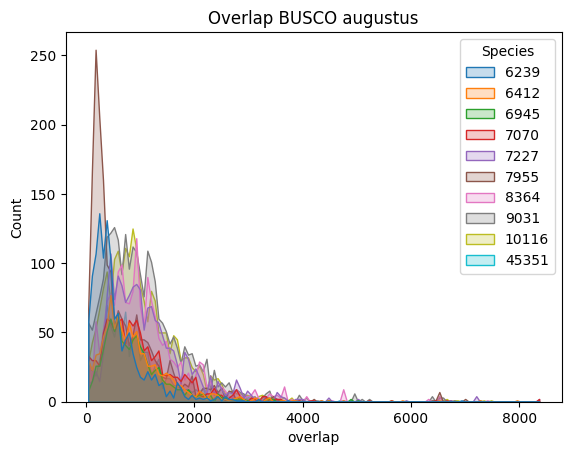

In [3]:
sb.histplot(busco_augustus_df, x="overlap", hue="Species", element="poly", palette=palette)
plt.title('Overlap BUSCO augustus')
plt.savefig('busco_augustus_coverage.png', dpi=900, bbox_inches='tight')

    Species         GeneID   transcript  overlap   uniprotID  coverage
1      6239  103854at33208  r2.m1.g1.t1   2056.0      Q19954  1.000000
3      6239  311758at33208  r2.m1.g1.t1    668.0      G8JY22  0.891856
7      6239  418979at33208  r2.m1.g1.t1    568.0      Q20893  1.000000
9      6239  387878at33208  r2.m1.g1.t1   1469.0      Q17598  1.000000
11     6239  539234at33208        g1.t1   2196.0  A0A131MBU3  1.000000
(11151, 6)


<Axes: xlabel='overlap', ylabel='Count'>

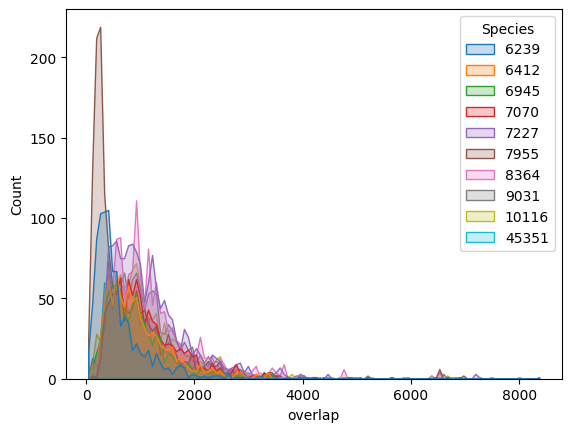

In [4]:
#max_df_b_a = busco_augustus_df.groupby(['Species', 'GeneID', 'transcript'], as_index=False)['coverage'].max()
max_values = busco_augustus_df.groupby(['Species', 'GeneID', 'transcript'])['coverage'].transform('max')
max_df_b_a = busco_augustus_df[busco_augustus_df['coverage'] == max_values]
print(max_df_b_a.head())
print(max_df_b_a.shape)
sb.histplot(max_df_b_a, x="overlap", hue="Species", element="poly", palette=palette)

<Axes: xlabel='coverage', ylabel='Count'>

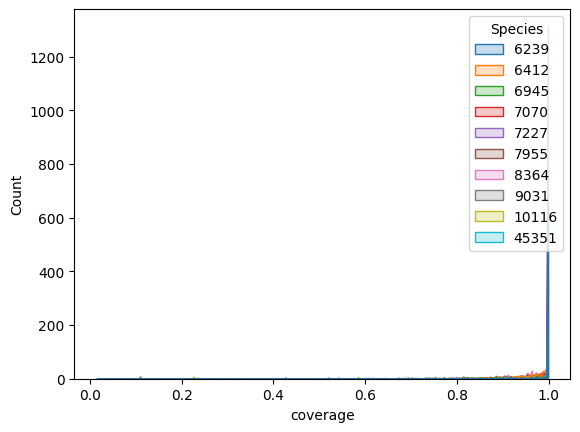

In [5]:
sb.histplot(max_df_b_a, x="coverage", hue="Species", element="poly", palette=palette)

In [6]:
print(max_df_b_a.head())
print(max_df_b_a["Species"].value_counts())
print(max_df_b_a[max_df_b_a['coverage']>= 0.5]["Species"].value_counts())

    Species         GeneID   transcript  overlap   uniprotID  coverage
1      6239  103854at33208  r2.m1.g1.t1   2056.0      Q19954  1.000000
3      6239  311758at33208  r2.m1.g1.t1    668.0      G8JY22  0.891856
7      6239  418979at33208  r2.m1.g1.t1    568.0      Q20893  1.000000
9      6239  387878at33208  r2.m1.g1.t1   1469.0      Q17598  1.000000
11     6239  539234at33208        g1.t1   2196.0  A0A131MBU3  1.000000
Species
7955     1562
7227     1484
8364     1384
9031     1179
10116    1143
7070      956
6239      892
6412      873
45351     868
6945      810
Name: count, dtype: int64
Species
7955     1545
7227     1484
8364     1380
9031     1161
10116    1116
7070      956
6239      872
6412      863
45351     852
6945      800
Name: count, dtype: int64


<Axes: xlabel='coverage', ylabel='Count'>

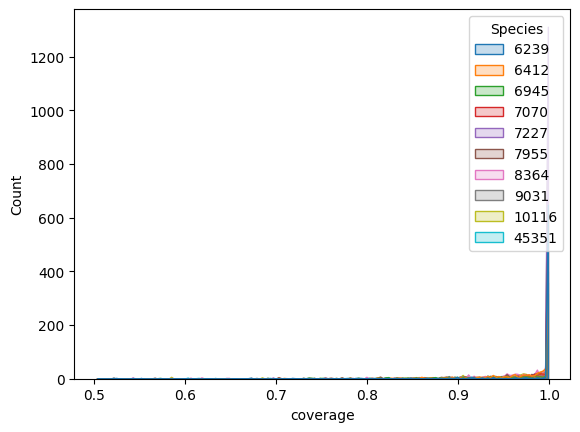

In [7]:
sb.histplot(max_df_b_a[max_df_b_a['coverage']>= 0.5], x="coverage", hue="Species", element="poly", palette=palette)

<Axes: xlabel='overlap', ylabel='Count'>

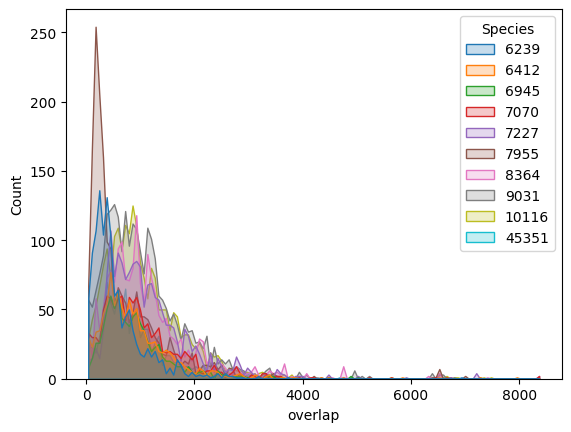

In [8]:
with_overlap = busco_augustus_df.dropna()
sb.histplot(with_overlap, x="overlap", hue="Species", element="poly", palette=palette)
#plt.xscale('log')

### BUSCO MetaEuk

   Species         GeneID                                         transcript  \
0     6239  446000at33208  446000at33208_6239_0:00007b|BX284601.5|+|55821...   
1     6239  446000at33208  446000at33208_6239_0:000685|BX284601.5|+|49019...   
2     6239  642773at33208  642773at33208_6239_0:000102|BX284601.5|+|74923...   
3     6239  357580at33208  357580at33208_6239_0:00073f|BX284601.5|+|41932...   
4     6239  603370at33208  603370at33208_6239_0:000148|BX284601.5|-|83291...   

   overlap uniprotID  coverage  
0    631.0    P91402  0.718679  
1    870.0    P91266  0.987514  
2    310.0    Q22850  0.990415  
3    956.0    O02097  0.971545  
4    431.0    Q20647  0.990805  


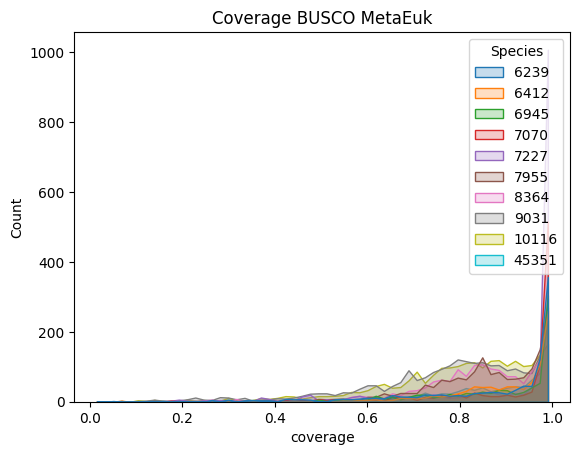

In [9]:
busco_metaeuk_df = pd.read_csv('../overlap_tables/busco_metaeuk_overlap_gff_files_gallus_2.tsv', delimiter='\t')
print(busco_metaeuk_df.head())

sb.histplot(busco_metaeuk_df, x="coverage", hue="Species", element="poly", palette=palette)

plt.title('Coverage BUSCO MetaEuk')
plt.savefig('busco_metaeuk_coverage.png', dpi=900, bbox_inches='tight')

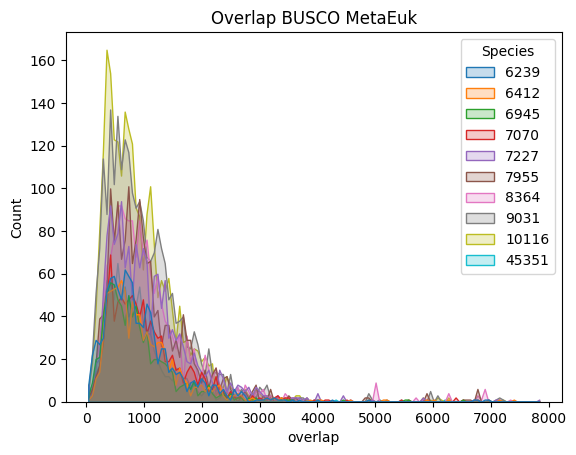

In [10]:
sb.histplot(busco_metaeuk_df, x="overlap", hue="Species", element="poly", palette=palette)

plt.title('Overlap BUSCO MetaEuk')
plt.savefig('busco_metaeuk_overlap.png', dpi=900, bbox_inches='tight')

   Species         GeneID                                         transcript  \
0     6239  446000at33208  446000at33208_6239_0:00007b|BX284601.5|+|55821...   
1     6239  446000at33208  446000at33208_6239_0:000685|BX284601.5|+|49019...   
2     6239  642773at33208  642773at33208_6239_0:000102|BX284601.5|+|74923...   
3     6239  357580at33208  357580at33208_6239_0:00073f|BX284601.5|+|41932...   
4     6239  603370at33208  603370at33208_6239_0:000148|BX284601.5|-|83291...   

   overlap uniprotID  coverage  
0    631.0    P91402  0.718679  
1    870.0    P91266  0.987514  
2    310.0    Q22850  0.990415  
3    956.0    O02097  0.971545  
4    431.0    Q20647  0.990805  
(10548, 6)


<Axes: xlabel='overlap', ylabel='Count'>

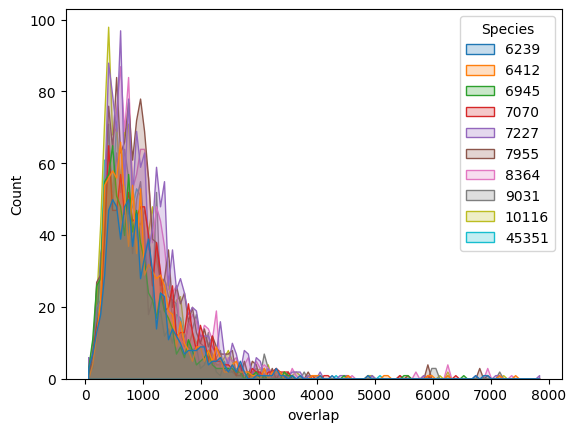

In [11]:
max_values = busco_metaeuk_df.groupby(['Species', 'GeneID', 'transcript'])['coverage'].transform('max')
max_df_b_m = busco_metaeuk_df[busco_metaeuk_df['coverage'] == max_values]
print(max_df_b_m.head())
print(max_df_b_m.shape)
sb.histplot(max_df_b_m, x="overlap", hue="Species", element="poly", palette=palette)

<Axes: xlabel='coverage', ylabel='Count'>

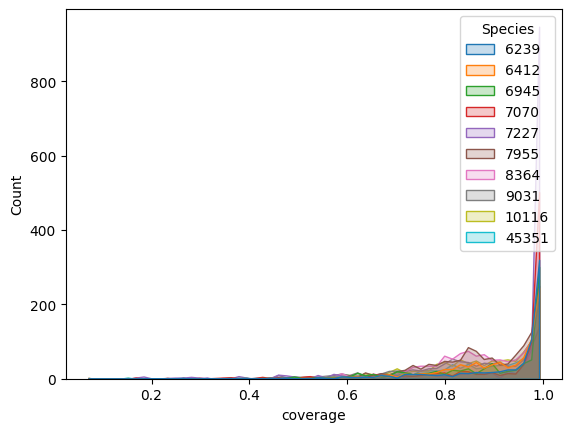

In [12]:
sb.histplot(max_df_b_m, x="coverage", hue="Species", element="poly", palette=palette)

### fDOG-Assembly Augustus

   Species         GeneID                        transcript  overlap  \
0    10116  516659at33208  516659at33208_CM026976_1_1_g1.t1    928.0   
1    10116  516659at33208  516659at33208_CM026976_1_1_g1.t1    717.0   
2    10116  516659at33208  516659at33208_CM026976_1_1_g1.t1    346.0   
3    10116  516659at33208  516659at33208_CM026976_1_1_g1.t1    479.0   
4    10116  516659at33208  516659at33208_CM026976_1_1_g1.t1    569.0   

    uniprotID  coverage  
0  A0A8I5ZWJ6  1.000000  
1  A0A8I5ZWJ6  0.869091  
2  A0A8I5ZWJ6  0.419394  
3  A0A8I5ZWJ6  1.000000  
4  A0A8I5ZWJ6  0.914791  


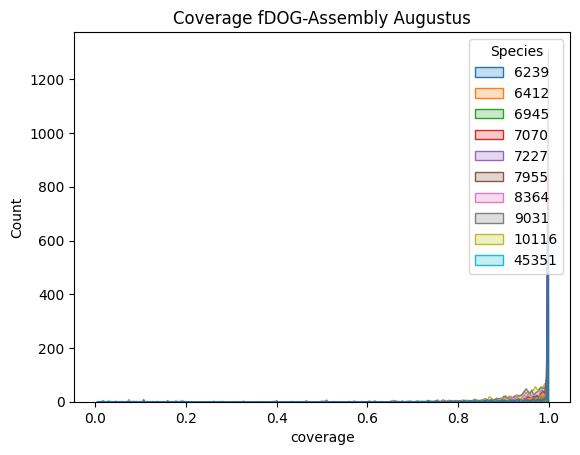

In [13]:
fa_augustus_df = pd.read_csv('../overlap_tables/fdog_ass_busco_augustus_overlap_gff_files_gallus_v2.tsv', delimiter='\t')
print(fa_augustus_df.head())

sb.histplot(fa_augustus_df, x="coverage", hue="Species", element="poly", palette=palette)

plt.title('Coverage fDOG-Assembly Augustus')
plt.savefig('fa_augustus_coverage.png', dpi=900, bbox_inches='tight')

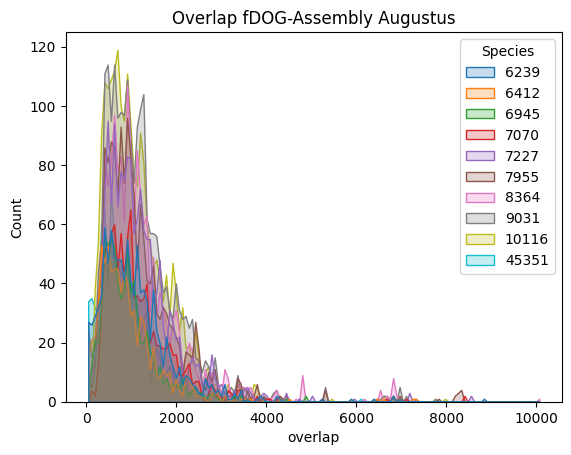

In [14]:
sb.histplot(fa_augustus_df, x="overlap", hue="Species", element="poly", palette=palette)

plt.title('Overlap fDOG-Assembly Augustus')
plt.savefig('fa_augustus_overlap.png', dpi=900, bbox_inches='tight')

   Species         GeneID                        transcript  overlap  \
0    10116  516659at33208  516659at33208_CM026976_1_1_g1.t1    928.0   
3    10116  516659at33208  516659at33208_CM026976_1_1_g1.t1    479.0   
6    10116  505248at33208  505248at33208_CM026976_1_1_g3.t1    556.0   
7    10116  505248at33208  505248at33208_CM026976_1_1_g3.t1    361.0   
8    10116  628247at33208  628247at33208_CM026976_1_1_g1.t1    380.0   

    uniprotID  coverage  
0  A0A8I5ZWJ6       1.0  
3  A0A8I5ZWJ6       1.0  
6  A0A8I6A648       1.0  
7  A0A8I6A648       1.0  
8      B1H286       1.0  
(10688, 6)


<Axes: xlabel='overlap', ylabel='Count'>

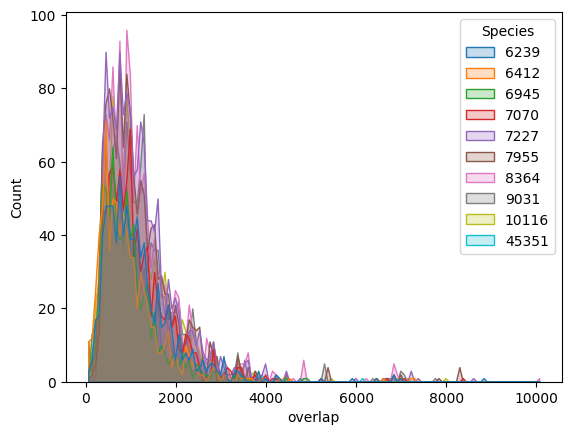

In [15]:
max_values = fa_augustus_df.groupby(['Species', 'GeneID', 'transcript'])['coverage'].transform('max')
max_df_fa_a = fa_augustus_df[fa_augustus_df['coverage'] == max_values]
print(max_df_fa_a.head())
print(max_df_fa_a.shape)
sb.histplot(max_df_fa_a, x="overlap", hue="Species", element="poly", palette=palette)

<Axes: xlabel='coverage', ylabel='Count'>

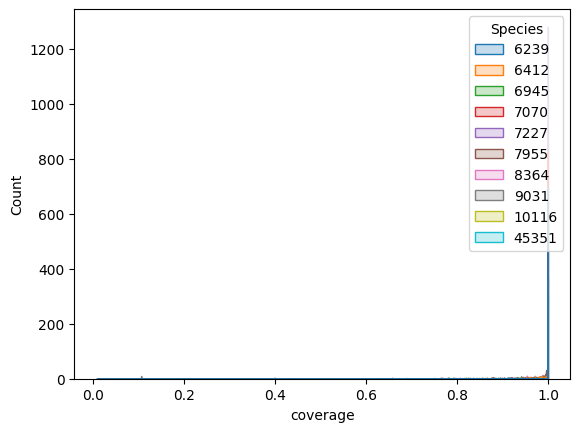

In [16]:
sb.histplot(max_df_fa_a, x="coverage", hue="Species", element="poly", palette=palette)

In [17]:
#get NEMVE genes too low overlap:
print(max_df_fa_a[(max_df_fa_a['coverage']< 0.5) & (max_df_fa_a['Species'] == 45351)])


      Species         GeneID                        transcript  overlap  \
2630    45351  601967at33208  601967at33208_DS469553_1_1_g4.t1    172.0   
2642    45351  523376at33208  523376at33208_DS469567_1_1_g3.t1    263.0   
2645    45351  223234at33208  223234at33208_DS469584_1_1_g1.t1    195.0   
2651    45351  485003at33208  485003at33208_DS469723_1_1_g2.t1    245.0   
2662    45351  502691at33208  502691at33208_DS469610_1_1_g1.t1    274.0   
2673    45351  305260at33208  305260at33208_DS469511_1_1_g1.t1     85.0   
2683    45351  595010at33208  595010at33208_DS469511_1_1_g3.t1    407.0   
2725    45351  379076at33208  379076at33208_DS469722_1_1_g2.t1    217.0   
2726    45351  487987at33208  487987at33208_DS469722_1_1_g2.t1    181.0   
2810    45351  361216at33208  361216at33208_DS469562_1_1_g1.t1    196.0   
2811    45351  359532at33208  359532at33208_DS469562_1_3_g1.t1    196.0   
2812    45351  359532at33208  359532at33208_DS469562_1_1_g1.t1    196.0   
2815    45351  558791at33

### fDOG-Assembly MetaEuk

   Species         GeneID                         transcript  overlap  \
0     6412  516659at33208  516659at33208_KB097640.1_1_3_mRNA    938.0   
1     6412  382000at33208  382000at33208_KB097640.1_1_8_mRNA    211.0   
2     6412  459253at33208  459253at33208_KB097640.1_1_1_mRNA    511.0   
3     6412  502691at33208  502691at33208_KB097640.1_1_1_mRNA    502.0   
4     6412  393895at33208  393895at33208_KB097640.1_1_1_mRNA   1254.0   

  uniprotID  coverage  
0    T1FNQ2  0.985294  
1    T1EDH1  0.967890  
2    T1G7D1  0.607610  
3    T1G7C8  0.707042  
4    T1FNP8  0.850169  


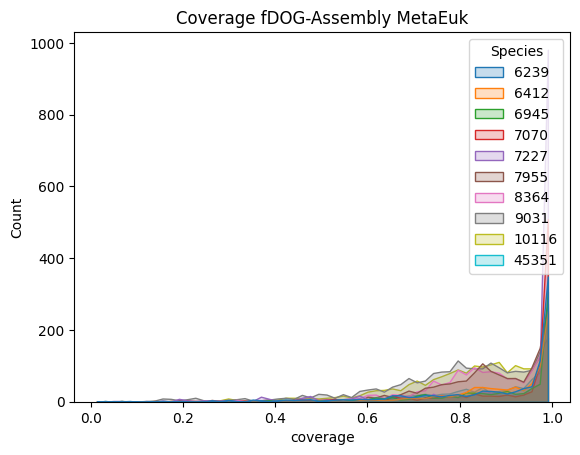

In [17]:
fa_metaeuk_df = pd.read_csv('../overlap_tables/fdog_ass_busco_metaeuk_overlap_gff_files_gallus_v2.tsv', delimiter='\t')
print(fa_metaeuk_df.head())

sb.histplot(fa_metaeuk_df, x="coverage", hue="Species", element="poly", palette=palette)

plt.title('Coverage fDOG-Assembly MetaEuk')
plt.savefig('fa_metaeuk_coverage.png', dpi=900, bbox_inches='tight')

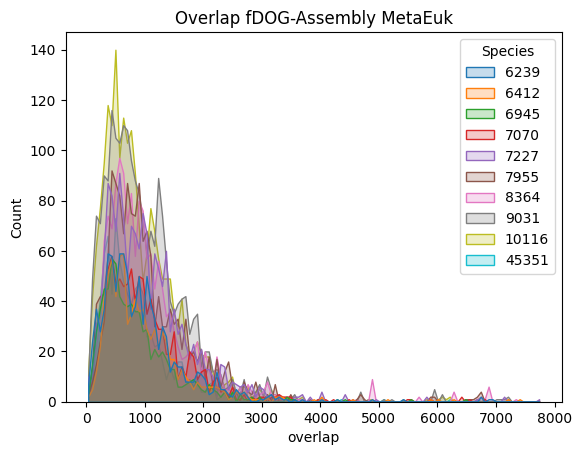

In [18]:
sb.histplot(fa_metaeuk_df, x="overlap", hue="Species", element="poly", palette=palette)

plt.title('Overlap fDOG-Assembly MetaEuk')
plt.savefig('fa_metaeuk_overlap.png', dpi=900, bbox_inches='tight')

   Species         GeneID                         transcript  overlap  \
0     6412  516659at33208  516659at33208_KB097640.1_1_3_mRNA    938.0   
1     6412  382000at33208  382000at33208_KB097640.1_1_8_mRNA    211.0   
2     6412  459253at33208  459253at33208_KB097640.1_1_1_mRNA    511.0   
3     6412  502691at33208  502691at33208_KB097640.1_1_1_mRNA    502.0   
4     6412  393895at33208  393895at33208_KB097640.1_1_1_mRNA   1254.0   

  uniprotID  coverage  
0    T1FNQ2  0.985294  
1    T1EDH1  0.967890  
2    T1G7D1  0.607610  
3    T1G7C8  0.707042  
4    T1FNP8  0.850169  
(10121, 6)


<Axes: xlabel='overlap', ylabel='Count'>

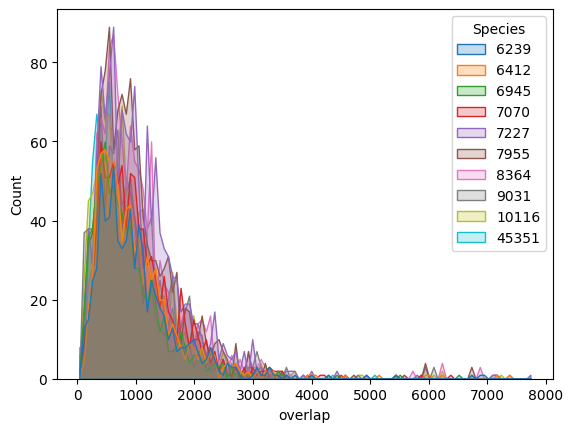

In [19]:
max_values = fa_metaeuk_df.groupby(['Species', 'GeneID', 'transcript'])['coverage'].transform('max')
max_df_fa_m = fa_metaeuk_df[fa_metaeuk_df['coverage'] == max_values]
print(max_df_fa_m.head())
print(max_df_fa_m.shape)
sb.histplot(max_df_fa_m, x="overlap", hue="Species", element="poly", palette=palette)

<Axes: xlabel='coverage', ylabel='Count'>

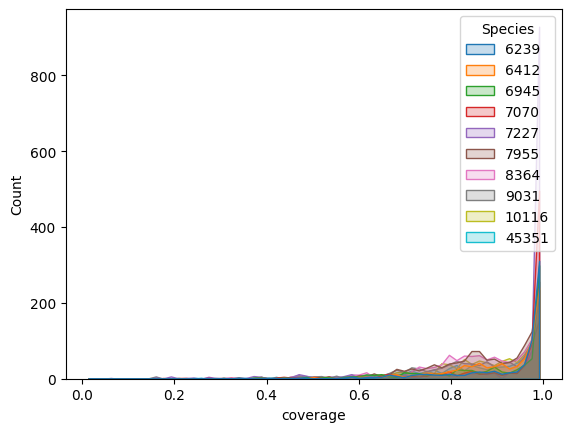

In [20]:
sb.histplot(max_df_fa_m, x="coverage", hue="Species", element="poly", palette=palette)